In [1]:
library(dplyr)
library(tidyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [24]:
options(repr.plot.width = 10, repr.plot.height = 8)

In [2]:
df <- read.csv("data/cars.csv")
df$price_in_1000 = df$price / 1000
colnames(df)

[1] "name"                                       
 [2] "model"                                      
 [3] "url"                                        
 [4] "price"                                      
 [5] "type"                                       
 [6] "ABS"                                        
 [7] "Acceleration..0.100.kmph."                  
 [8] "Air.Conditioner"                            
 [9] "Audio.Controls.on.Streeing.Wheel"           
[10] "Audio.System..with.remote."                 
[11] "Bluetooth.Connectivity"                     
[12] "Body.Coloured.Bumpers"                      
[13] "Boot.Space..litres."                        
[14] "Brakes.Front"                               
[15] "Brakes.Rear"                                
[16] "CD.Player"                                  
[17] "Central.Locking"                            
[18] "Clean.Air.Filter"                           
[19] "Cruise.Control"                             
[20] "Door.Ajar.Warning"                          
[21] "Driver.Seatbelt.Warning"                    
[22] "Dual.SRS.Airbags..D.P."                     
[23] "EBD"                                        
[24] "Engine.Size..cc."                           
[25] "Engine.Type"                                
[26] "Front.Track"                                
[27] "Front.Tyres"                                
[28] "Fuel.Supply.System"                         
[29] "Fuel.Tank.Capacity..litres."                
[30] "Fuel.Type"                                  
[31] "Full.Wheel.Caps"                            
[32] "Gross.Weight..kg."                          
[33] "Ground.Clearance..mm."                      
[34] "Heater"                                     
[35] "Immobiliser"                                
[36] "Kerb.Weight..kg."                           
[37] "Keyless.Entry"                              
[38] "Max.Power..bhp...rpm."                      
[39] "Max.Torque..Nm...rpm."                      
[40] "Mileage.in.City..kmpl."                     
[41] "Mileage.on.Highway..kmpl."                  
[42] "No..of.Cylinders"                           
[43] "Overall.Length.mm..x.Width.mm..x.Height.mm."
[44] "Panoramic.Sunroof"                          
[45] "Passenger.Airbags"                          
[46] "Power.Steering"                             
[47] "Power.Windows..Front."                      
[48] "Power.Windows..Rear."                       
[49] "Rain.Sensing.Wipers"                        
[50] "Rear.Track"                                 
[51] "Rear.Tyres"                                 
[52] "Seat.Capacity"                              
[53] "Speakers"                                   
[54] "Tilt.Function"                              
[55] "Top.Speed..kmph."                           
[56] "Traction.Control"                           
[57] "Transmission.Type"                          
[58] "Tubeless.Tyres"                             
[59] "Turning.Circle.Radius..metres."             
[60] "USB...Auxiliary.Input"                      
[61] "Wheelbase..mm."                             
[62] "brand"                                      
[63] "price_in_1000"

In [3]:
head(df, 3)

,name,model,url,price,type,ABS,Acceleration..0.100.kmph.,Air.Conditioner,Audio.Controls.on.Streeing.Wheel,Audio.System..with.remote.,Bluetooth.Connectivity,Body.Coloured.Bumpers,Boot.Space..litres.,Brakes.Front,Brakes.Rear,CD.Player,Central.Locking,Clean.Air.Filter,Cruise.Control,Door.Ajar.Warning,Driver.Seatbelt.Warning,Dual.SRS.Airbags..D.P.,EBD,Engine.Size..cc.,Engine.Type,Front.Track,Front.Tyres,Fuel.Supply.System,Fuel.Tank.Capacity..litres.,Fuel.Type,Full.Wheel.Caps,Gross.Weight..kg.,Ground.Clearance..mm.,Heater,Immobiliser,Kerb.Weight..kg.,Keyless.Entry,Max.Power..bhp...rpm.,Max.Torque..Nm...rpm.,Mileage.in.City..kmpl.,Mileage.on.Highway..kmpl.,No..of.Cylinders,Overall.Length.mm..x.Width.mm..x.Height.mm.,Panoramic.Sunroof,Passenger.Airbags,Power.Steering,Power.Windows..Front.,Power.Windows..Rear.,Rain.Sensing.Wipers,Rear.Track,Rear.Tyres,Seat.Capacity,Speakers,Tilt.Function,Top.Speed..kmph.,Traction.Control,Transmission.Type,Tubeless.Tyres,Turning.Circle.Radius..metres.,USB...Auxiliary.Input,Wheelbase..mm.,brand,price_in_1000
1,Ashok Leyland Stile,Ashok Leyland Stile LE 8-STR (Diesel),http://carzoom.in/car-specification/ashok-leyland-stile-le-8-str-diesel/,749990,MPV,No,18.7,Manual,No,No,No,Yes,500,Disc,Drum,No,No,Yes,No,No,No,No,No,1461,"Turbo-intercooled, Common Rail Diesel Engine",NA,165 R14,CRDi,50,Diesel,Yes,2000,180,Yes,Yes,1426,No,75 @ 3300,185 @ 1750-2750,16.2,20.7,4,4400 x 1700 x 1860,No,No,Yes,No,No,No,NA,165 R14,8,No,Yes,140,No,5 Speed Manual,Yes,5.2,No,2725,Ashok,749.99
2,Ashok Leyland Stile,Ashok Leyland Stile LS 8-STR (Diesel),http://carzoom.in/car-specification/ashok-leyland-stile-ls-8-str-diesel/,799990,MPV,No,18.7,Manual,No,No,No,Yes,500,Disc,Drum,No,Yes,No,No,No,No,No,No,1461,"Turbo-intercooled, Common Rail Diesel Engine",NA,165 R14,CRDi,50,Diesel,No,2000,180,Yes,Yes,1426,No,75 @ 3300,185 @ 1750-2750,16.2,20.7,4,4400 x 1700 x 1860,No,No,Yes,Yes,No,No,NA,165 R14,8,No,Yes,140,No,5 Speed Manual,Yes,5.2,No,2725,Ashok,799.99
3,Ashok Leyland Stile,Ashok Leyland Stile LX 8-STR (Diesel),http://carzoom.in/car-specification/ashok-leyland-stile-lx-8-str-diesel/,829990,MPV,No,18.7,Manual,No,No,No,Yes,500,Disc,Drum,No,Yes,Yes,No,No,No,No,No,1461,"Turbo-intercooled, Common Rail Diesel Engine",NA,165 R14,CRDi,50,Diesel,No,2000,180,Yes,Yes,1426,No,75 @ 3300,185 @ 1750-2750,16.2,20.7,4,4400 x 1700 x 1860,No,No,Yes,Yes,No,No,NA,165 R14,8,No,Yes,140,No,5 Speed Manual,Yes,5.2,No,2725,Ashok,829.99


In [4]:
length(unique(df$name))

[1] 203

## Columns to consider

* name
* price
* type
* Engine.Size..cc.
* Fuel.Type
* Gross.Weight..kg.
* Ground.Clearance..mm.
* Max.Power..bhp...rpm.
* Mileage.in.City..kmpl.
* Mileage.on.Highway..kmpl.
* No..of.Cylinders
* Seat.Capacity
* Transmission.Type
* brand


## Pick the base model for car

Warning message:
: Removed 3 rows containing non-finite values (stat_bin).

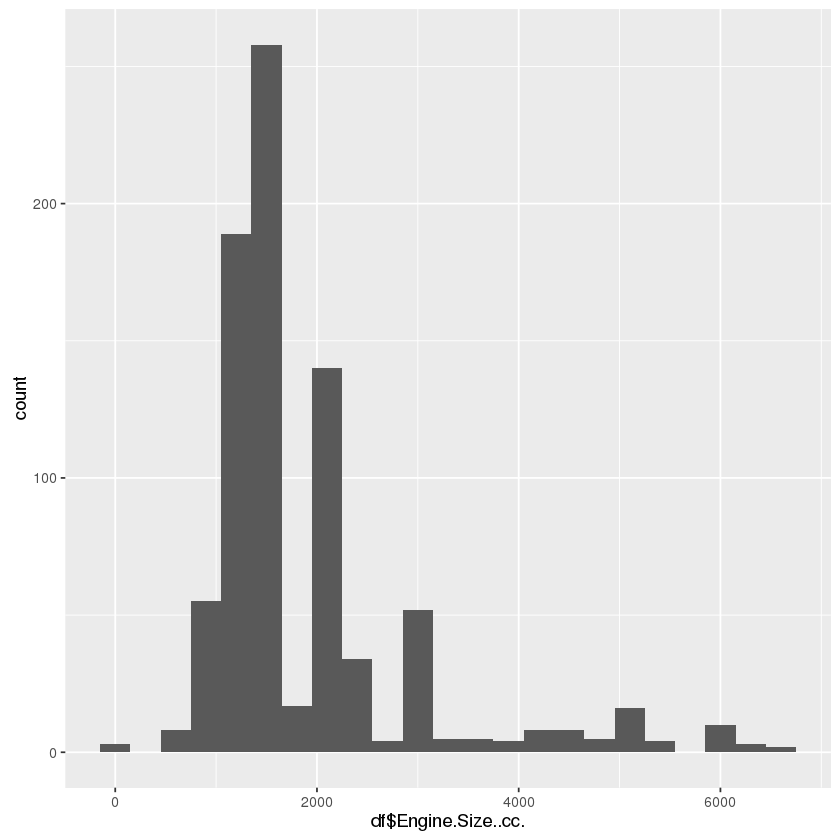

In [5]:
ggplot(df, aes(df$Engine.Size..cc.)) + geom_histogram(binwidth = 300)

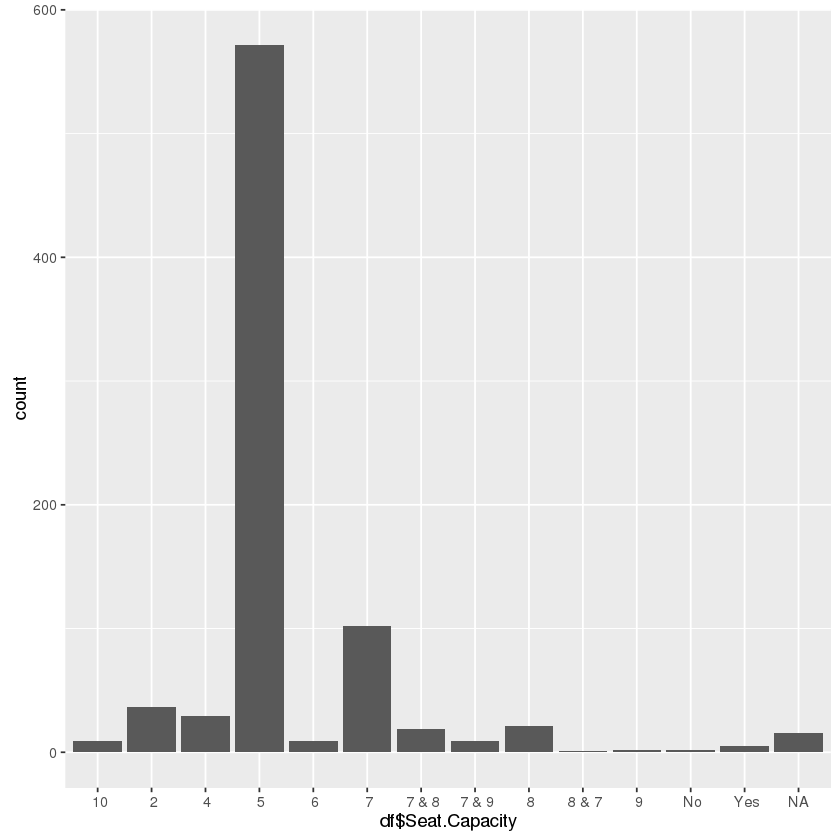

In [6]:
ggplot(df, aes(df$Seat.Capacity)) + geom_bar(stat = "count")

In [7]:
unique(df$type)

[1] MPV          Sedan        Coupe        Seadn        Cabriolet   
 [6] SUV          Luxury       Luxury Sedan Convertible  Hatchback‎    
[11] Hatchback    MUV          Sport Coupe  Sedna        Seadan      
[16] Supercar     hatchback    Hatchabck    Saloon       Saloon Sedan
[21] Sedans       <NA>         VAN          Van         
23 Levels: Cabriolet Convertible Coupe Hatchabck hatchback ... VAN

In [8]:
df$type[df$type == "Seadan" ] = "Sedan"
unique(df$type)

[1] MPV          Sedan        Coupe        Seadn        Cabriolet   
 [6] SUV          Luxury       Luxury Sedan Convertible  Hatchback‎    
[11] Hatchback    MUV          Sport Coupe  Sedna        Supercar    
[16] hatchback    Hatchabck    Saloon       Saloon Sedan Sedans      
[21] <NA>         VAN          Van         
23 Levels: Cabriolet Convertible Coupe Hatchabck hatchback ... VAN

In [9]:
df$type[df$type == "Sedna" | df$type == "Sedans" | df$type == "Seadn"] = "Sedan"
unique(df$type)

[1] MPV          Sedan        Coupe        Cabriolet    SUV         
 [6] Luxury       Luxury Sedan Convertible  Hatchback‎     Hatchback   
[11] MUV          Sport Coupe  Supercar     hatchback    Hatchabck   
[16] Saloon       Saloon Sedan <NA>         VAN          Van         
23 Levels: Cabriolet Convertible Coupe Hatchabck hatchback ... VAN

### Exercise 1:
Clean all order types too

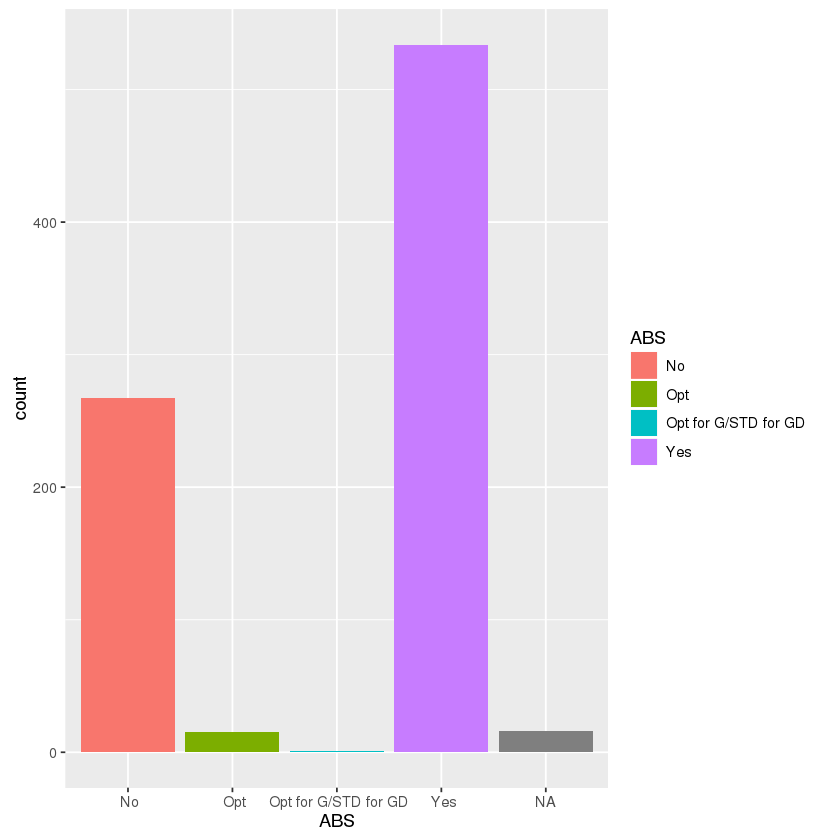

In [10]:
ggplot(df, aes(ABS, fill=ABS)) + geom_bar(stat = "count")

In [11]:
class(df$Mileage.in.City..kmpl.)

[1] "factor"

In [12]:
head(df$Mileage.in.City..kmpl.)

[1]  16.2  16.2  16.2  16.2  16.2  16.2
161 Levels:  10  10.0  10.1  10.2  10.34  10.5  10.6  10.7  10.8  10.9 ...  9.8

In [13]:
df <- mutate(df, num_mileage_city = as.numeric(as.character(df$Mileage.in.City..kmpl.)))

Warning message:
In eval(substitute(expr), envir, enclos): NAs introduced by coercion

In [14]:
colnames(df)

[1] "name"                                       
 [2] "model"                                      
 [3] "url"                                        
 [4] "price"                                      
 [5] "type"                                       
 [6] "ABS"                                        
 [7] "Acceleration..0.100.kmph."                  
 [8] "Air.Conditioner"                            
 [9] "Audio.Controls.on.Streeing.Wheel"           
[10] "Audio.System..with.remote."                 
[11] "Bluetooth.Connectivity"                     
[12] "Body.Coloured.Bumpers"                      
[13] "Boot.Space..litres."                        
[14] "Brakes.Front"                               
[15] "Brakes.Rear"                                
[16] "CD.Player"                                  
[17] "Central.Locking"                            
[18] "Clean.Air.Filter"                           
[19] "Cruise.Control"                             
[20] "Door.Ajar.Warning"                          
[21] "Driver.Seatbelt.Warning"                    
[22] "Dual.SRS.Airbags..D.P."                     
[23] "EBD"                                        
[24] "Engine.Size..cc."                           
[25] "Engine.Type"                                
[26] "Front.Track"                                
[27] "Front.Tyres"                                
[28] "Fuel.Supply.System"                         
[29] "Fuel.Tank.Capacity..litres."                
[30] "Fuel.Type"                                  
[31] "Full.Wheel.Caps"                            
[32] "Gross.Weight..kg."                          
[33] "Ground.Clearance..mm."                      
[34] "Heater"                                     
[35] "Immobiliser"                                
[36] "Kerb.Weight..kg."                           
[37] "Keyless.Entry"                              
[38] "Max.Power..bhp...rpm."                      
[39] "Max.Torque..Nm...rpm."                      
[40] "Mileage.in.City..kmpl."                     
[41] "Mileage.on.Highway..kmpl."                  
[42] "No..of.Cylinders"                           
[43] "Overall.Length.mm..x.Width.mm..x.Height.mm."
[44] "Panoramic.Sunroof"                          
[45] "Passenger.Airbags"                          
[46] "Power.Steering"                             
[47] "Power.Windows..Front."                      
[48] "Power.Windows..Rear."                       
[49] "Rain.Sensing.Wipers"                        
[50] "Rear.Track"                                 
[51] "Rear.Tyres"                                 
[52] "Seat.Capacity"                              
[53] "Speakers"                                   
[54] "Tilt.Function"                              
[55] "Top.Speed..kmph."                           
[56] "Traction.Control"                           
[57] "Transmission.Type"                          
[58] "Tubeless.Tyres"                             
[59] "Turning.Circle.Radius..metres."             
[60] "USB...Auxiliary.Input"                      
[61] "Wheelbase..mm."                             
[62] "brand"                                      
[63] "price_in_1000"                              
[64] "num_mileage_city"

Warning message:
: Removed 306 rows containing missing values (geom_point).Warning message:
In grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : conversion failure on 'Hatchback‎' in 'mbcsToSbcs': dot substituted for <e2>Warning message:
In grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : conversion failure on 'Hatchback‎' in 'mbcsToSbcs': dot substituted for <80>Warning message:
In grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : conversion failure on 'Hatchback‎' in 'mbcsToSbcs': dot substituted for <8e>Warning message:
In grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : conversion failure on 'Hatchback‎' in 'mbcsToSbcs': dot substituted for <e2>Warning message:
In grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : conversion failure on 'Hatchback‎' in 'mbcsToSbcs': dot substituted for <80>Warning message:
In grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : conversion failure on 'Hatchback‎' in 'mbcsToSb

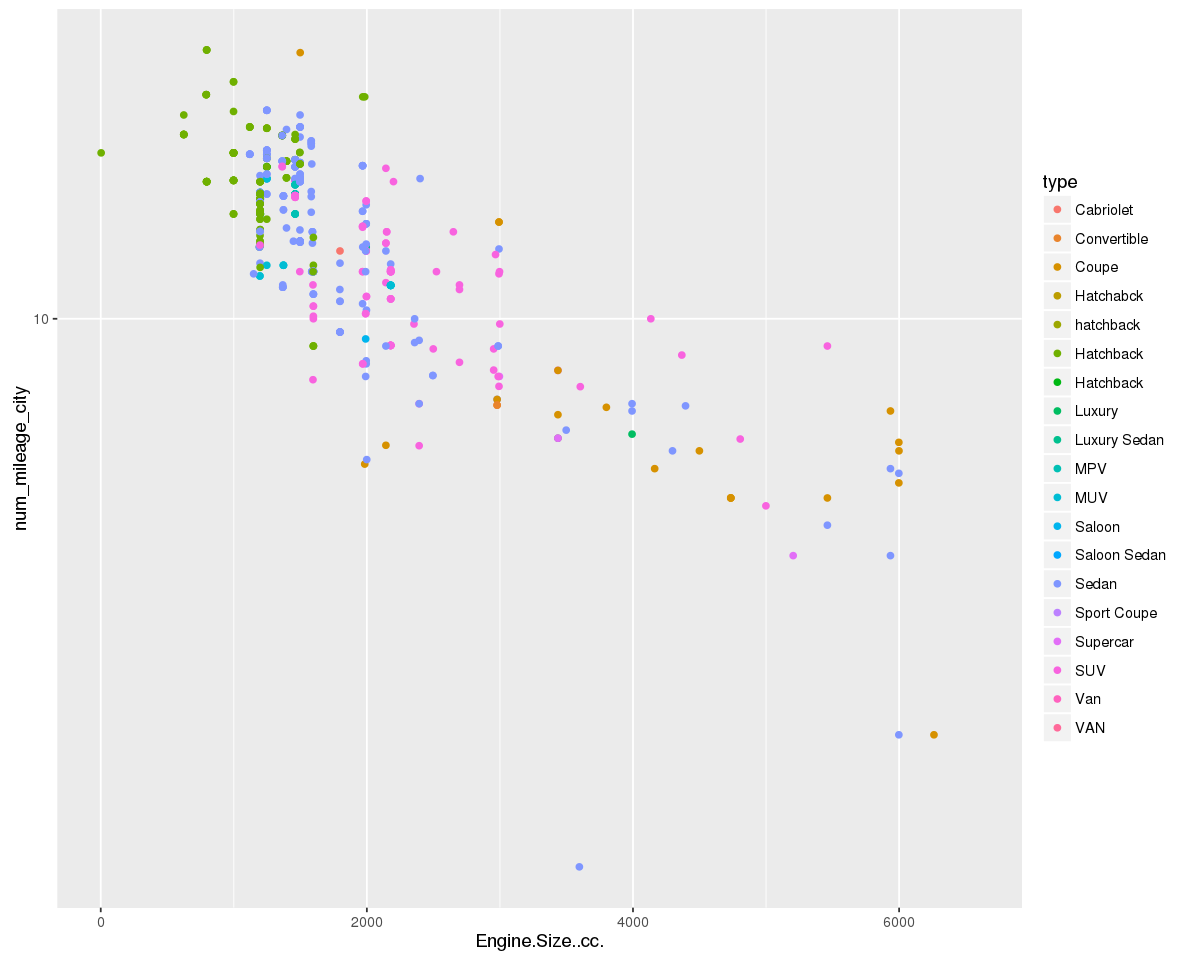

In [25]:
ggplot(df,
 aes(Engine.Size..cc.,num_mileage_city, color=type)) + geom_point() + scale_y_log10()
 
#ggplot(df, aes(Mileage.in.City..kmpl., price_in_1000)) + geom_point(size = 1, alpha = 0.5)

Warning message:
: Removed 452 rows containing missing values (geom_point).

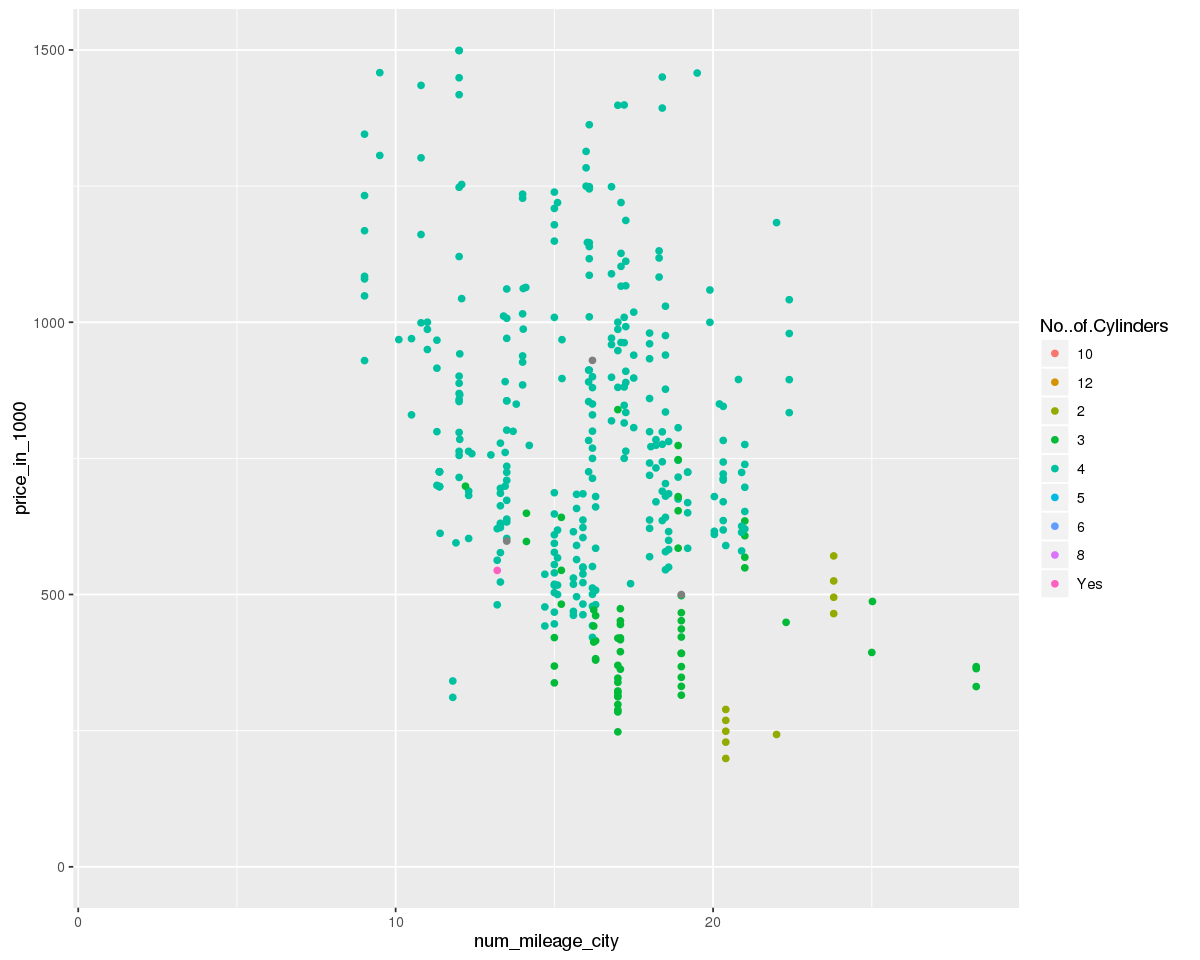

In [26]:
ggplot(df,
 aes(num_mileage_city, price_in_1000, color=No..of.Cylinders)) + geom_point() + ylim(c(0,1500))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
: Removed 3 rows containing non-finite values (stat_bin).

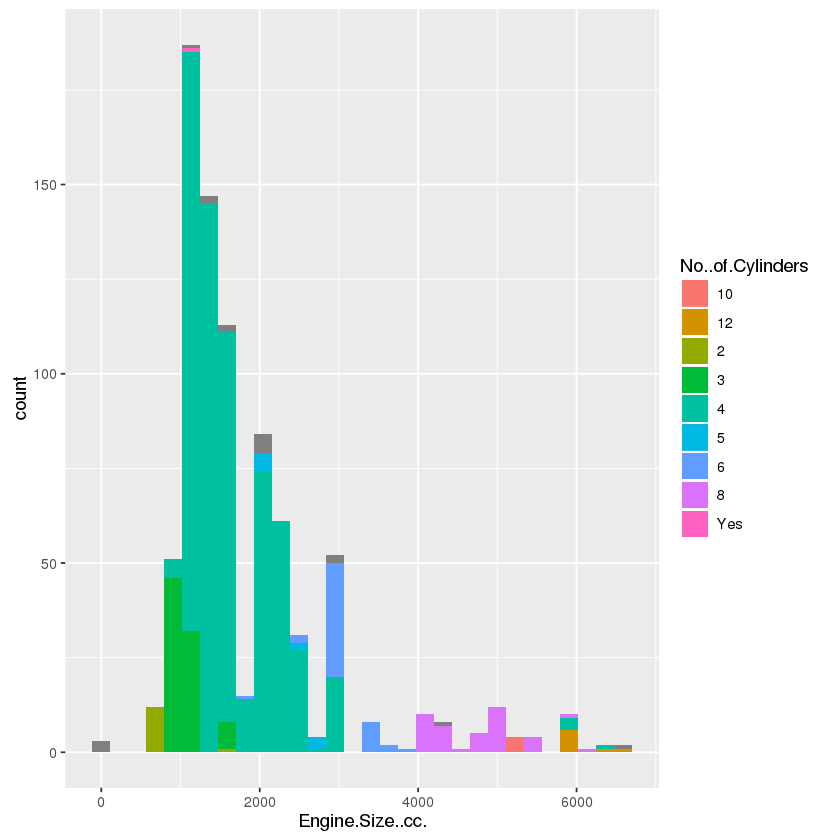

In [52]:
ggplot(df, aes(Engine.Size..cc., fill= No..of.Cylinders)) + geom_histogram()

Warning message:
: Removed 3 rows containing non-finite values (stat_bin).Warning message:
In grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : conversion failure on 'Hatchback‎' in 'mbcsToSbcs': dot substituted for <e2>Warning message:
In grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : conversion failure on 'Hatchback‎' in 'mbcsToSbcs': dot substituted for <80>Warning message:
In grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : conversion failure on 'Hatchback‎' in 'mbcsToSbcs': dot substituted for <8e>Warning message:
In grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : conversion failure on 'Hatchback‎' in 'mbcsToSbcs': dot substituted for <e2>Warning message:
In grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : conversion failure on 'Hatchback‎' in 'mbcsToSbcs': dot substituted for <80>Warning message:
In grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : conversion failure on 'Hatchback‎' in 'mbcsToSbc

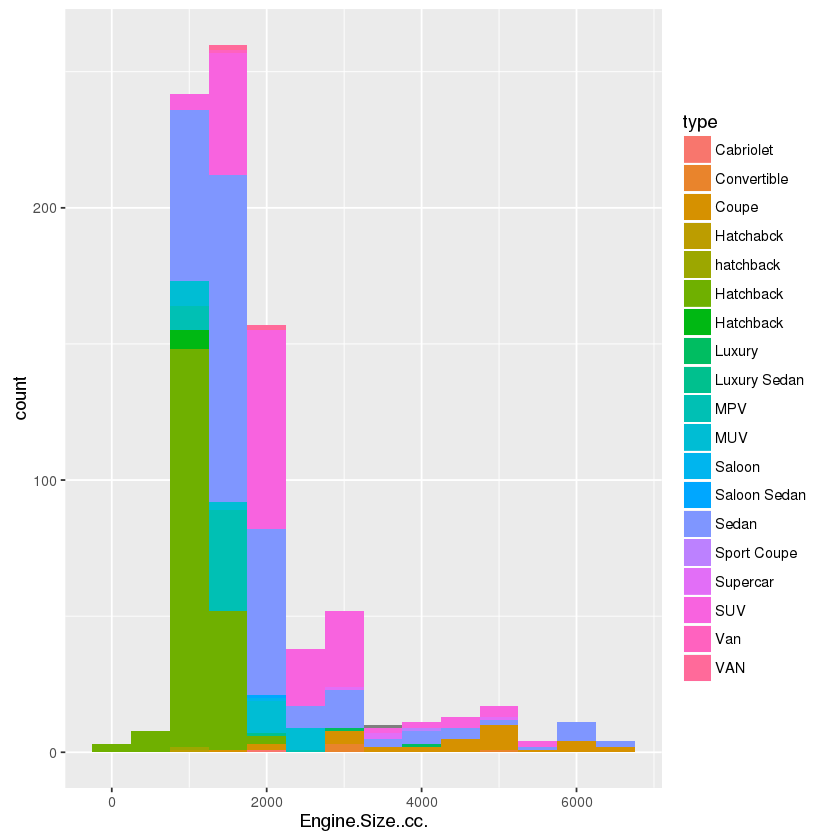

In [26]:
ggplot(df, aes(Engine.Size..cc., fill= type)) + geom_histogram(binwidth = 500)